In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def polynomial_dataframe(feature, degree): 
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = np.apply_along_axis(lambda x: x**power, 0, feature)
            
    return poly_dataframe

In [4]:
sales_df = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales_df = sales_df.sort_values(by=['sqft_living', 'price'])
sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [5]:
poly1_data = polynomial_dataframe(sales_df['sqft_living'], 1)
poly1_data['price'] = sales_df['price']

poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


In [6]:
import warnings
warnings.filterwarnings(action="ignore", module="sklearn", message="^internal gelsd")

regr = linear_model.LinearRegression()

regr.fit(poly1_data['power_1'].values.reshape(-1,1), poly1_data['price'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
regr.coef_

array([280.6235679])

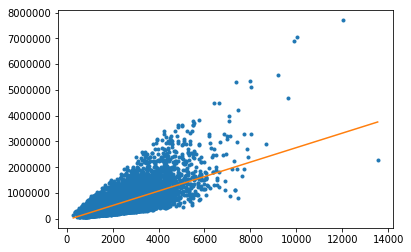

In [8]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], regr.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')

### Second degree

In [9]:
poly2_data = polynomial_dataframe(sales_df['sqft_living'], 2)
poly2_data['price'] = sales_df['price']

poly2_data.head()

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0
860,380.0,144400.0,245000.0
18379,384.0,147456.0,265000.0
4868,390.0,152100.0,228000.0


In [10]:
regr2 = linear_model.LinearRegression()
regr2.fit(np.array(poly2_data.drop(columns=['price'])), np.array(poly2_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
regr2.coef_

array([6.79940947e+01, 3.85812609e-02])

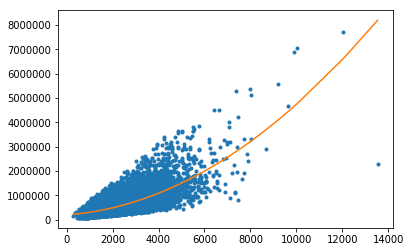

In [12]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
poly2_data['power_1'], regr2.predict(np.array(poly2_data.drop(columns=['price']))),'-')

### Third degree

In [13]:
poly3_data = polynomial_dataframe(sales_df['sqft_living'], 3)
poly3_data['price'] = sales_df['price']

poly3_data.head()

,power_1,power_2,power_3,price
19452,290.0,84100.0,24389000.0,142000.0
15381,370.0,136900.0,50653000.0,276000.0
860,380.0,144400.0,54872000.0,245000.0
18379,384.0,147456.0,56623104.0,265000.0
4868,390.0,152100.0,59319000.0,228000.0


In [14]:
regr3 = linear_model.LinearRegression()
regr3.fit(np.array(poly3_data.drop(columns=['price'])), np.array(poly3_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
regr3.coef_

array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06])

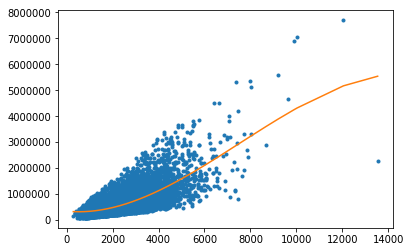

In [16]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
poly3_data['power_1'], regr3.predict(np.array(poly3_data.drop(columns=['price']))),'-')

### Fifteenth degree

In [17]:
poly15_data = polynomial_dataframe(sales_df['sqft_living'], 15)
poly15_data['price'] = sales_df['price']

poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,245000.0
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0


In [18]:
regr15 = linear_model.LinearRegression()
regr15.fit(np.array(poly15_data.drop(columns=['price'])), np.array(poly15_data['price']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regr15.coef_

array([ 4.56404164e-91, -2.64606098e-50,  4.63261894e-56, -2.13210389e-60,
        1.68437469e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

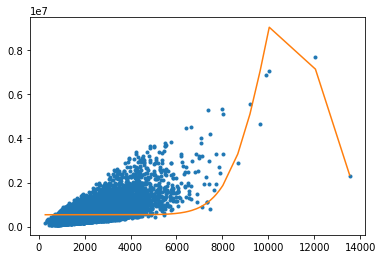

In [20]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
poly15_data['power_1'], regr15.predict(np.array(poly15_data.drop(columns=['price']))),'-')

In [21]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

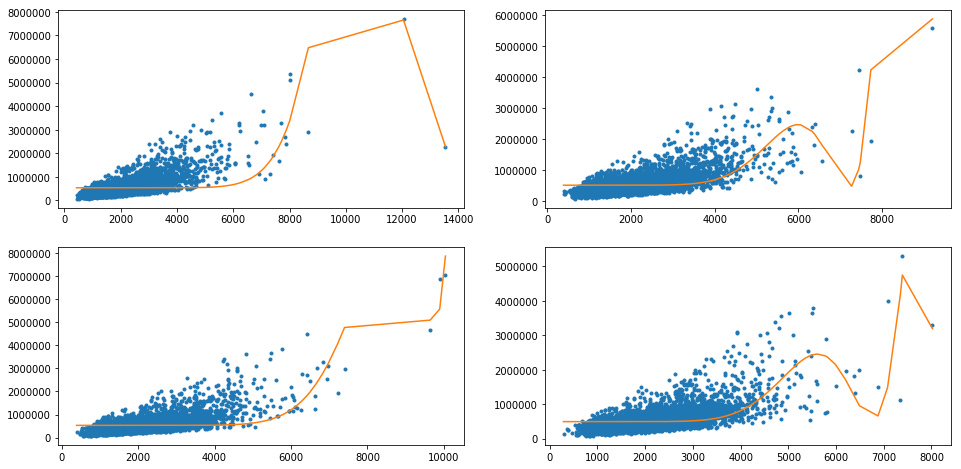

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,8))

weights = {}

for i, setN in enumerate((set_1, set_2, set_3, set_4)):
    polyN = polynomial_dataframe(setN['sqft_living'], 15)
    polyN['price'] = setN['price']
    
    regrN = linear_model.LinearRegression()
    regrN.fit(np.array(polyN.drop(columns=['price'])), np.array(polyN['price']))
    
    weights[i+1] = regrN.coef_
    
    ax = axes[i // 2][i % 2]
    
    ax.plot(polyN['power_1'],polyN['price'],'.',
            polyN['power_1'], regrN.predict(np.array(polyN.drop(columns=['price']))),'-')
    
plt.show()

In [23]:
pd.DataFrame(weights).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,3.057942e-90,2.996187e-49,-1.413753e-55,1.321897e-59,2.732868e-74,1.103583e-70,8.377240e-67,6.234120e-63,4.491564e-59,3.069388e-55,1.917493e-51,1.013352e-47,3.621770e-44,-5.635017e-48,2.186411e-52
2,2.713359e-77,7.335437e-39,8.999529e-45,-2.422464e-49,2.341538e-53,-3.784005e-57,3.645495e-55,1.504162e-51,5.760156e-48,1.957705e-44,5.393965e-41,9.403763e-38,-3.635291e-41,4.654765e-45,-1.971978e-49
3,2.837519e-88,5.402162e-49,9.234416e-55,2.602509e-59,1.904941e-72,4.278949e-69,2.680096e-65,1.639114e-61,9.664350e-58,5.380447e-54,2.725636e-50,1.162532e-46,3.337561e-43,-6.762388e-47,3.431329e-51
4,1.371160e-76,2.796079e-40,-2.127967e-44,-7.561959e-50,1.214879e-53,9.037717e-58,1.270700e-54,4.878690e-51,1.735490e-47,5.470583e-44,1.395876e-40,2.250419e-37,-9.439541e-41,1.315731e-44,-6.091615e-49


<hr>

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

No

**Quiz Question: True/False the plotted fitted lines look the same in all four plots**

False

<hr>

In [24]:
train_df = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validate_df = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_df = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [25]:
def rss(y, y_hat): 
    return np.dot((y - y_hat).T, (y - y_hat))

In [27]:
for i in range(15):
    trainN = polynomial_dataframe(train_df['sqft_living'], i+1)
    trainN['price'] = train_df['price']
    
    regrN = linear_model.LinearRegression()
    regrN.fit(np.array(trainN.drop(columns=['price'])), np.array(trainN['price']))
    
    validate = regrN.predict(np.array(polynomial_dataframe(validate_df['sqft_living'], i+1)))
    test = regrN.predict(np.array(polynomial_dataframe(test_df['sqft_living'], i+1)))
    
    print('{}:\tvalidate: {:.6}\ttest:{:.6}'.format(i+1, rss(validate_df['price'], validate), rss(test_df['price'], test)))
    
    

1:	validate: 6.29098e+14	test:1.42348e+14
2:	validate: 6.23955e+14	test:1.35542e+14
3:	validate: 6.2582e+14	test:1.35586e+14
4:	validate: 6.29987e+14	test:1.35383e+14
5:	validate: 6.28238e+14	test:1.35496e+14
6:	validate: 5.66269e+14	test:1.35225e+14
7:	validate: 1.07384e+15	test:1.33047e+14
8:	validate: 7.08786e+15	test:1.34874e+14
9:	validate: 4.52995e+16	test:1.45663e+14
10:	validate: 2.47574e+17	test:1.63698e+14
11:	validate: 1.19419e+18	test:1.84483e+14
12:	validate: 5.25111e+18	test:2.04248e+14
13:	validate: 7.61623e+17	test:2.69961e+14
14:	validate: 2.29756e+18	test:2.74049e+14
15:	validate: 6.95504e+18	test:2.76694e+14


<hr>

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

7

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)**

1.35225e+14